# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Carregue os dados da tarefa anterior

In [136]:
from plotly import graph_objects
from IPython.display import FileLink, display
from plotly import graph_objects

import plotly.express as px
import plotly.graph_objects as go
import yfinance as yf
import pandas as pd
import numpy as np


In [68]:
std_company = pd.read_csv('./standard_deviation.csv')
std_company.index = ['META', 'APPL', 'NVDA']

############################################################

average_company = pd.read_csv('./average_deviation.csv')
average_company.index = ['META', 'APPL', 'NVDA']

############################################################

print('STD_COMPANY')
print(average_company)
print('\n')
print('AVERAGE_COMPANY')
print(std_company)

STD_COMPANY
      Amplitude
META  13.262538
APPL   3.990435
NVDA   3.791251


AVERAGE_COMPANY
      Amplitude
META   7.727094
APPL   2.576445
NVDA   2.508938


In [66]:
%%time

asset = ['AAPL', 'META', 'NVDA']
date_time = '2023-07-30'

df_yfinance = yf.download(asset, start=date_time).reset_index()
df_yfinance

<timed exec>:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
[*********************100%***********************]  3 of 3 completed

CPU times: total: 188 ms
Wall time: 1.05 s


Price        Date       Close                                High              \
Ticker                   AAPL        META        NVDA        AAPL        META   
0      2023-07-31  194.502579  316.861694   46.700256  194.542191  323.883172   
1      2023-08-01  193.670914  320.949219   46.478394  194.779806  322.371439   
2      2023-08-02  190.670944  312.595093   44.241779  193.245161  316.652849   
3      2023-08-03  189.274948  311.481201   44.487621  190.463050  314.226152   
4      2023-08-04  180.185928  309.034637   44.652519  185.522496  316.672727   
..            ...         ...         ...         ...         ...         ...   
501    2025-07-30  209.050003  695.210022  179.270004  212.389999  708.500000   
502    2025-07-31  207.570007  773.440002  177.869995  209.839996  784.750000   
503    2025-08-01  202.380005  750.010010  173.720001  213.580002  766.000000   
504    2025-08-04  203.350006  776.369995  180.000000  207.880005  776.849976   
505    2025-08-05  202.830002  774.590088  179.419998  204.259094  779.700012   

Price                      Low                                Open  \
Ticker        NVDA        AAPL        META        NVDA        AAPL   
0        47.101011  193.324373  315.857195   46.477394  194.116445   
1        46.871153  193.344183  312.943153   45.998689  194.294673   
2        45.811812  189.948185  308.955058   43.360322  193.106550   
3        45.090251  188.799711  308.238978   43.773061  189.670992   
4        45.613926  180.116615  308.507530   44.365697  183.680934   
..             ...         ...         ...         ...         ...   
501     179.889999  207.720001  691.200012  176.039993  211.899994   
502     183.300003  207.160004  765.510010  175.929993  208.490005   
503     176.539993  201.500000  745.309998  170.889999  210.869995   
504     180.199997  201.679993  758.409973  174.520004  204.509995   
505     179.710007  202.160004  773.500122  178.580002  203.434998   

Price                              Volume                       
Ticker        META        NVDA       AAPL      META       NVDA  
0       321.923919   46.725242   38824100  25799600  251055000  
1       315.807444   46.431422   35175100  22817900  237858000  
2       316.264962   45.802819   50389300  20461100  530142000  
3       308.238978   43.773061   61235200  15180200  324176000  
4       313.241539   44.957332  115956800  17612800  362666000  
..             ...         ...        ...       ...        ...  
501     708.090027  176.509995   45512500  27077300  174312200  
502     775.200012  182.899994   80698400  38831100  221685400  
503     760.729980  174.089996  104434500  19028700  204529000  
504     760.000000  175.160004   75020600  15763800  147674000  
505     776.380005  179.619995    2927941    777344   13639590  

[506 rows x 16 columns]

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [98]:
# Criei uma função para gerar um gráfico, passando como parâmetros o df, função e título. 

def plot_rolling(df, func, window=90, title='Rolling Média'):
    rolling_result = func(df.rolling(window))
    df_result = rolling_result.stack().reset_index()
    df_result.columns = ['Data', 'Ativo', 'Valor']

    fig = px.line(df_result,
                 x = 'Data',
                 y = 'Valor',
                 color = 'Ativo',
                 title = title)
    fig.show()

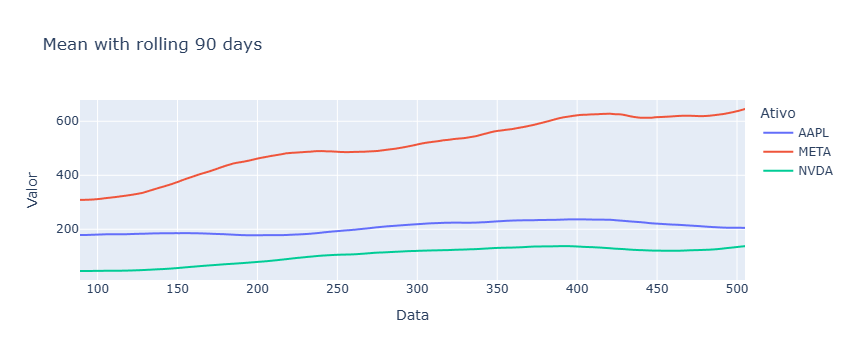

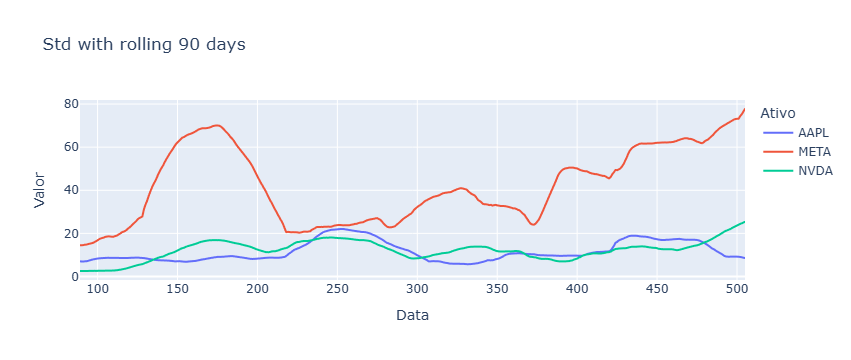

In [110]:
plot_rolling(df_yfinance['Close'], 
             func=lambda r: r.mean(),
             title='Mean with rolling 90 days')

plot_rolling(df_yfinance['Close'],
             func=lambda s: s.std(),
             title='Std with rolling 90 days')

## Insights

### Graph 1: Mean
- **Meta**: The average share price is higher than the others
- **APPL**: is the intermediary
- **NVDA**: is the lowest, with slight growth

**APPL** and **NVDA** shares indicate more conservative behavior. Unlike **Meta**, which fluctuates a lot.

### Graph 2: Standard deviation
This graph shows volatility, the greater the standard deviation, the greater the price fluctuation.
- **Meta**: as expected, it has high volatility, we can see this in the previous chart
- **APPL** and **NVDA** are similar, have lower standard deviation, decreasing their prices have been more results in the last 90 days.
----

The previous activity graph (Daily amplitude per asset) corroborates the analysis of the mean and standard deviation of this activity.

There is a more pronounced oscillation for **Meta** and it works "independently", not respecting the correlation.

While the others remain stable, with an evident correlation, that is, when **AAPL** increases, **NVDA** also increases, when one decreases, the other decreases too.

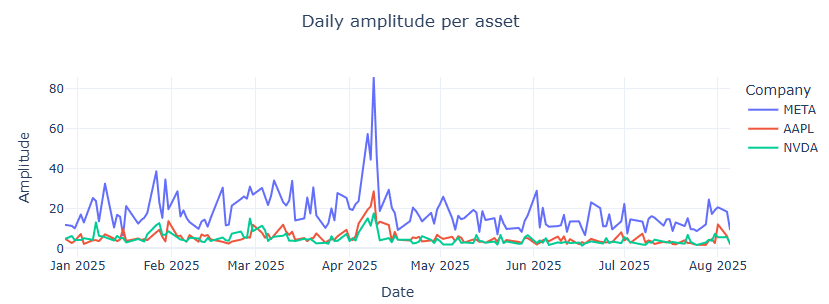

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [176]:
# Criando um DEF para criar o gráfico.

def grafico_candlestick(database, sigla = 'sigla', titulo = 'título'):
    indicadores = ['Close', 'High', 'Low', 'Open', 'Volume']
    ativo = [sigla]*len(indicadores)
    
    colunas = list(zip(indicadores, ativo))
    
    df = database.loc['2025-06-01':,colunas]
    df.columns = indicadores
    
    candlestick = go.Candlestick(
        x = df.index,
        open = df['Open'],
        high = df['High'],
        low = df['Low'],
        close = df['Close'],
        name = sigla,
        showlegend = True)
    
    layout = go.Layout(
        title=dict(text=titulo, x=0.5),
        paper_bgcolor = 'rgba(0,0,0,0)',
        plot_bgcolor = 'rgba(0,0,0,0)')
    
    grafico = go.Figure(data=[candlestick], layout=layout)
    
    grafico.update_xaxes(showgrid = True,
                         gridwidth = 1,
                         gridcolor = 'LightGrey')
    grafico.update_yaxes(showgrid = True,
                         gridwidth = 1,
                         gridcolor = 'LightGrey')
    
    return grafico

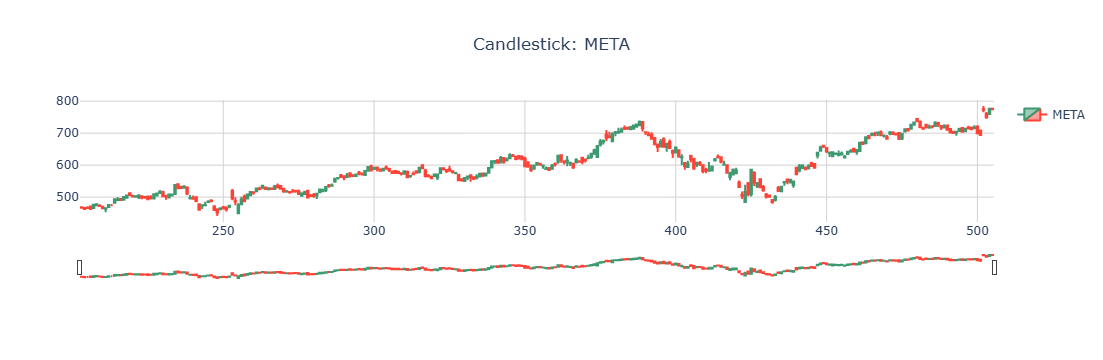

In [174]:
grafico_candlestick(df_yfinance, 'META', 'Candlestick: META')